In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from xgboost import XGBClassifier

from tpot import TPOTClassifier, TPOTRegressor
from tpot.config import classifier_config_dict

from deap.gp import Primitive


!pip install -qq logger
from evolution import NeuroEvolution

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## IMPORT DATA

In [2]:
path = 'C:\Users\DELL\Documents\GitHub\Fetal-Health\NOTEBOOK.csv'
df = pd.read_csv(path)
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


## Describe data

In [3]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


## Correlation graph

<AxesSubplot:>

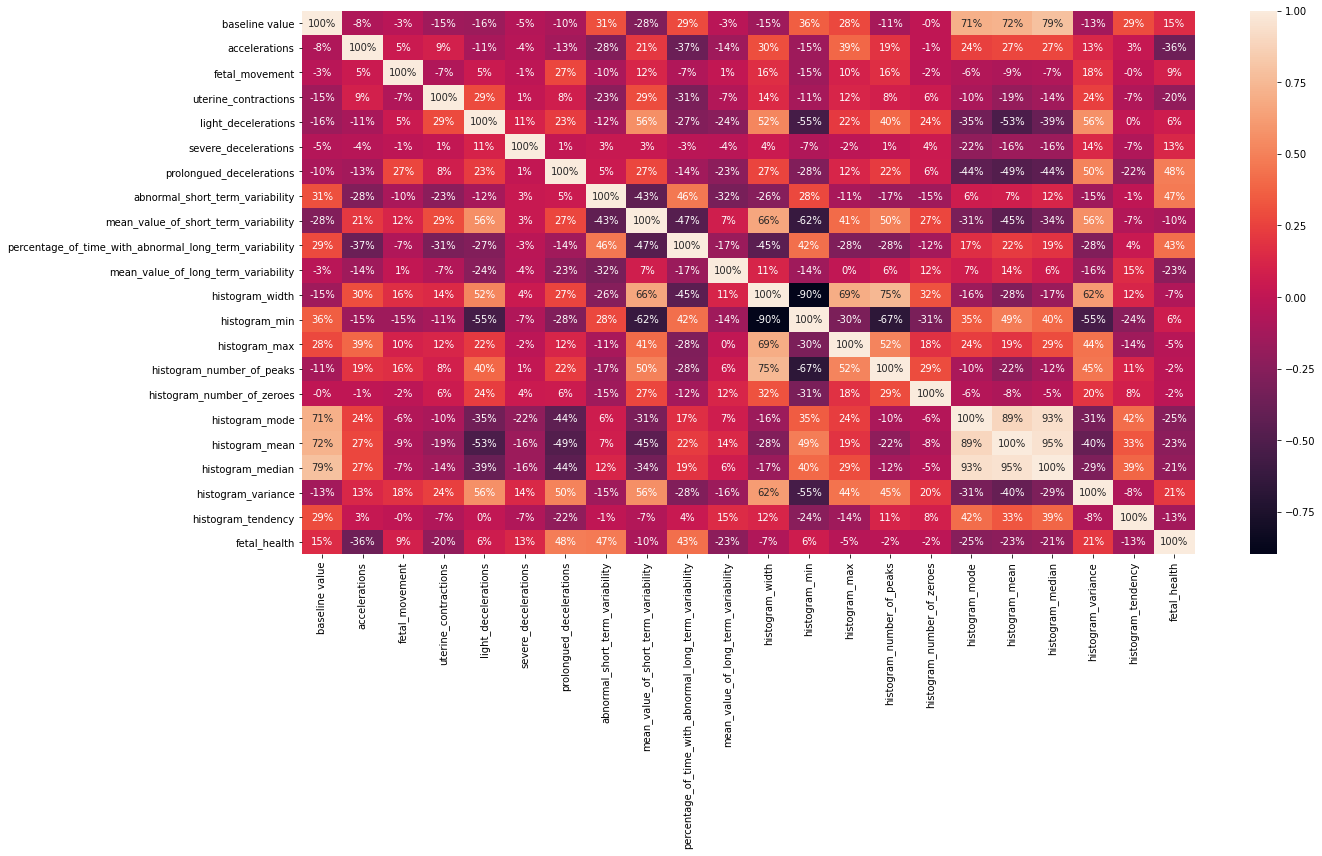

In [4]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, fmt='.0%')

## Feature Engineering

In [5]:
X=df.drop(["fetal_health"],axis=1)
y=df["fetal_health"]

In [6]:
col_names = list(X.columns)
s_scaler = preprocessing.StandardScaler()
X_df= s_scaler.fit_transform(X)
X_df = pd.DataFrame(X_df, columns=col_names)   
X_df.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,1.069490e-15,1.000235,-2.775197,-0.742373,-0.030884,0.680604,2.713428
accelerations,2126.0,-6.015884e-17,1.000235,-0.822388,-0.822388,-0.304881,0.730133,4.093929
fetal_movement,2126.0,-1.336863e-17,1.000235,-0.203210,-0.203210,-0.203210,-0.138908,10.106540
uterine_contractions,2126.0,-1.336863e-16,1.000235,-1.482465,-0.803434,-0.124404,0.894142,3.610264
light_decelerations,2126.0,-5.347452e-17,1.000235,-0.638438,-0.638438,-0.638438,0.375243,4.429965
severe_decelerations,2126.0,6.684315e-18,1.000235,-0.057476,-0.057476,-0.057476,-0.057476,17.398686
prolongued_decelerations,2126.0,1.336863e-17,1.000235,-0.268754,-0.268754,-0.268754,-0.268754,8.208570
abnormal_short_term_variability,2126.0,-7.352747e-17,1.000235,-2.035639,-0.872088,0.116930,0.815060,2.327675
mean_value_of_short_term_variability,2126.0,6.684315e-17,1.000235,-1.282833,-0.716603,-0.150373,0.415857,6.417893
percentage_of_time_with_abnormal_long_term_variability,2126.0,-5.347452e-17,1.000235,-0.535361,-0.535361,-0.535361,0.062707,4.412293


## Split training/testing data

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.25, random_state=23)

<h1 id="class" style="color:#a05d40; background:#e8e5dc; border:0.5px dotted;"> 
    <center>Classification
        <a class="anchor-link" href="#class" target="_self">¶</a>
    </center>
</h1>

## Loading TPOT with XGBoost

In [8]:
classifier_config_dict['xgboost.XGBClassifier'] = {
    'n_estimators': [100],
    'max_depth': range(1, 11),
    'learning_rate': [1e-3, 1e-2, 1e-1, 0.5, 1.],
    'subsample': np.arange(0.05, 1.01, 0.05),
    'min_child_weight': range(1, 21),
    'n_jobs': [1],
    'verbosity': [0]
}
        
# for a quick test
tpot = TPOTClassifier(generations=2, population_size=10, verbosity=2,
                      config_dict=classifier_config_dict)
tpot.fit(X_train, y_train)

Optimization Progress:   0%|          | 0/30 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9240827270755702

Generation 2 - Current best internal CV score: 0.9240827270755702

Best pipeline: RandomForestClassifier(input_matrix, bootstrap=False, criterion=entropy, max_features=0.6500000000000001, min_samples_leaf=10, min_samples_split=15, n_estimators=100)


TPOTClassifier(config_dict={'sklearn.cluster.FeatureAgglomeration': {'affinity': ['euclidean',
                                                                                  'l1',
                                                                                  'l2',
                                                                                  'manhattan',
                                                                                  'cosine'],
                                                                     'linkage': ['ward',
                                                                                 'complete',
                                                                                 'average']},
                            'sklearn.decomposition.FastICA': {'tol': array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])},
                            'sklearn.decomposition.PC

## Fit XGBoost with best parameters

In [9]:
xgb = XGBClassifier(tpot._optimized_pipeline)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

## Analyze results

In [10]:
preds = xgb.predict(X_test)
acc = accuracy_score(y_test, preds)
print("Accuracy: {:1.3f}".format(acc))

Accuracy: 0.964


<h1 id="inference" style="color:#a05d40; background:#e8e5dc; border:0.5px dotted;"> 
    <center>Inference
        <a class="anchor-link" href="#inference" target="_self">¶</a>
    </center>
</h1>

## Transform labels to one hot encodings

In [11]:
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

## Set the parameters for genetic hyperparameter tunning

In [12]:
params = {
    "epochs": [25, 75, 100],
    "batch_size": [8, 16, 32],
    "n_layers": [1, 2, 3],
    "n_neurons": [8, 16, 32],
    "dropout": [0.0],
    "optimizers": ["nadam", "adam", "adadelta", "sgd"],
    "activations": ["relu", "sigmoid", "tanh"],
    "last_layer_activations": ["tanh", "sigmoid", "relu", "softmax"],
    "losses": ["mean_absolute_error", "mean_squared_error",
               "mean_squared_logarithmic_error"],
    "metrics": ["accuracy"]
}

## Use of NeuroEvolution to find best parameters

In [13]:
search = NeuroEvolution(generations=2, population=10, params=params)

search.evolve(X_train, y_train, X_test, y_test)

100%|██████████| 10/10 [54:48<00:00, 328.89s/it]

[01/May/2021 17:25:32] INFO - best accuracy: 0.6666666865348816, best params: {'epochs': 25, 'batch_size': 32, 'n_layers': 2, 'n_neurons': 16, 'dropout': 0.0, 'optimizers': 'adam', 'activations': 'relu', 'last_layer_activations': 'relu', 'losses': 'mean_absolute_error', 'metrics': 'accuracy'}


## Use best parameters to train a DNN

In [14]:
n_layers = search.best_params.network['n_layers']
n_neurons = search.best_params.network['n_neurons']
activation = search.best_params.network['activations']
last_activation = search.best_params.network['last_layer_activations']

model = tf.keras.Sequential()
for n in range(n_layers):
    model.add(Dense(n_neurons, activation=activation))
model.add(Dense(y_train.shape[1], activation=last_activation))

## Model build and summary

In [15]:
model.build(X_train.shape)
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (1594, 16)                352       
_________________________________________________________________
dense_28 (Dense)             (1594, 16)                272       
_________________________________________________________________
dense_29 (Dense)             (1594, 3)                 51        
Total params: 675
Trainable params: 675
Non-trainable params: 0
_________________________________________________________________


## Compile and fit the model

In [16]:
epochs = search.best_params.network['epochs']
batch_size = search.best_params.network['batch_size']
optimizer = search.best_params.network['optimizers']
loss = search.best_params.network['losses']
metrics = [search.best_params.network['metrics']]

In [17]:
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=0)

## Analyze results

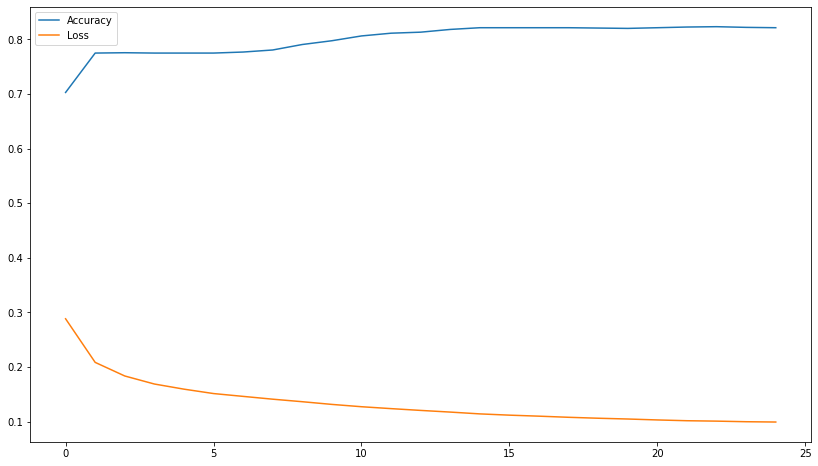

In [18]:
_ = plt.figure(figsize=(14,8))
_ = plt.plot(history.history['accuracy'], label="Accuracy")
_ = plt.plot(history.history['loss'], label="Loss")
plt.legend()
plt.show()

In [19]:
preds = model.predict(X_test)
acc = accuracy_score(np.argmax(preds, axis=1), np.argmax(y_test.values, axis=1))
print("Accuracy: {:1.3f}".format(acc))

Accuracy: 0.827
